# Aplicação da Transformada de Laplace (TL)
## Análise de Circuito RC
O modelo matemático é dado por
$$v_c(t)=\dfrac{1}{C}\int_0^ti(\tau)d\tau$$
e
$$\left(D+\dfrac{1}{RC}\right)v_c(t)=\dfrac{1}{RC}v(t)$$
onde
* $v(t)$ é a tensão de entrada,
* $v_c(t)$ é a tensão no capacitor,
* $i(t)$ é a corrente no circuito.
* $R=0,8\,\Omega$,
* $C=0,1\,F$.

Considere condições iniciais nulas.
## Análise
1. Determine a resposta em frequência $H_v(s)$ para a relação $V_c(s)/V(s)$.
2. Calcular os espectros de amplitude e fase de $H_v(s)$.
3. Obtenha a resposta ao impulso unitário $h_v(t)$, considerando $v_c(t)$ como saída.
4. Calcule a resposta $v_c(t)$ para entrada degrau $u(t)$.
5. Determine a resposta em frequência $H_I(s)$ para a relação $I(s)/V(s)$.
6. Calcular os espectros de amplitude e fase de $H_I(s)$.
7. Obtenha a resposta ao impulso unitário $h_i(t)$, considerando $i(t)$ como saída.

In [2]:
# carregamos as librarias e definimos os símbolo que utilizaremos
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
s, t = sp.symbols('s t')
# Definimos os parâmetros do exercício
R, C = sp.symbols('R C', positive=True)
#R = 0.8
#C = 0.1

## Determine a a resposta em frequência  $H_v(s)$

A resposta em frequêcia $H_v(s)$ é dada por
$$H_v(s)=\dfrac{1}{RCs+1}$$
que é $V_s(s)$ quando a entrada é um impulso unitário $\delta(t)$, isto é, $V(s)=1$.

In [3]:
Hv = 1/(R*C*s+1)
Hv

1/(C*R*s + 1)

## Calcular os espectros de amplitude e fase de  $H_v(s)$

In [22]:
# Preparamos a função Hv(jw)
#Hvw = np.vectorize(lambda w: Hv.subs(R, 0.8).subs(C, 0.1).subs(s,1j*w).evalf())
Hvw = lambda w: 1/(0.8*0.1*1j*w+1)

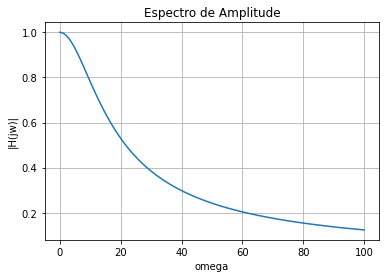

In [23]:
ws = np.linspace(0,100,100)
plt.plot(ws,np.abs(Hvw(ws)))
plt.grid()
plt.xlabel('omega')
plt.ylabel('|Hv(jw)|')
plt.title('Espectro de Amplitude')
plt.show()

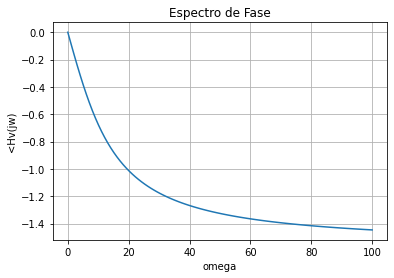

In [24]:
plt.plot(ws,np.angle(Hvw(ws)))
plt.grid()
plt.xlabel('omega')
plt.ylabel('<Hv(jw)')
plt.title('Espectro de Fase')
plt.show()

## Obtenha a resposta ao impulso unitário  $h_v(t)$ , considerando  $v_c(t)$  como saída

In [25]:
hv = sp.inverse_laplace_transform(Hv,s,t)
hv

exp(-t/(C*R))*Heaviside(t)/(C*R)

In [29]:
hvt = np.vectorize(lambda tn: hv.subs(R, 0.8).subs(C, 0.1).subs(t,tn).evalf())

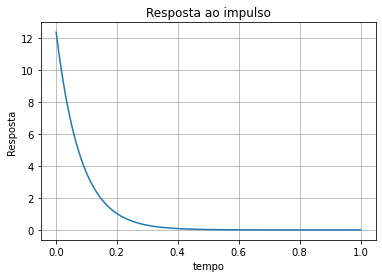

In [34]:
ts = np.linspace(0.001,1,100)
plt.plot(ts, hvt(ts))
plt.grid()
plt.xlabel('tempo')
plt.ylabel('Resposta')
plt.title('Resposta ao impulso')
plt.show()

## Calcule a resposta  $v_c(t)$ para entrada degrau $u(t)$

In [35]:
resp_degrau = sp.inverse_laplace_transform(Hv/s,s,t)
resp_degrau

Heaviside(t) - exp(-t/(C*R))*Heaviside(t)

In [36]:
# preparamos a função para o gráfico
resp_degrau_t = np.vectorize(lambda tn: resp_degrau.subs(R, 0.8).subs(C, 0.1).subs(t,tn).evalf())

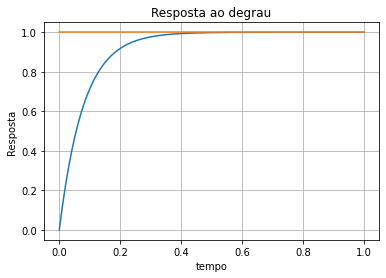

In [37]:
ts = np.linspace(0,1,100)
plt.plot(ts,resp_degrau_t(ts))
plt.step([0,1],[1,1])
plt.grid()
plt.xlabel('tempo')
plt.ylabel('Resposta')
plt.title('Resposta ao degrau')
plt.show()

## Determine a resposta em frequência $H_I(s)$ para a relação  $I(s)/V(s)$

In [51]:
Hi = C*s/(R*C*s+1)
Hi

C*s/(C*R*s + 1)

## Calcular os espectros de amplitude e fase de  $H_I(s)$

In [46]:
# Preparamos a função HI(jw)
Hiw = lambda w:(1/0.8)-(1/(0.8*(0.8*0.1*1j*w+1)))

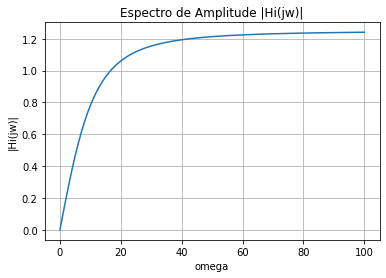

In [48]:
ws = np.linspace(0,100,100)
plt.plot(ws,np.abs(Hiw(ws)))
plt.grid()
plt.xlabel('omega')
plt.ylabel('|Hi(jw)|')
plt.title('Espectro de Amplitude |Hi(jw)|')
plt.show()

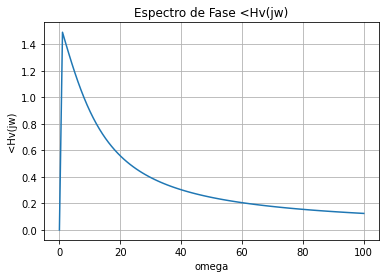

In [49]:
plt.plot(ws,np.angle(Hiw(ws)))
plt.grid()
plt.xlabel('omega')
plt.ylabel('<Hv(jw)')
plt.title('Espectro de Fase <Hv(jw)')
plt.show()

## Obtenha a resposta ao impulso unitário $h_i(t)$ , considerando  $i(t)$ como saída.

In [52]:
hi = sp.inverse_laplace_transform(Hi,s,t)
hi

C*InverseLaplaceTransform(s/(C*R*s + 1), s, t, _None)

In [53]:
hi = sp.inverse_laplace_transform((1/R)-(1/(R*(R*C*s+1))),s,t)
hi

DiracDelta(t)/R - exp(-t/(C*R))*Heaviside(t)/(C*R**2)

In [54]:
hit = np.vectorize(lambda tn: hi.subs(R,0.8).subs(C,0.1).subs(t,tn).evalf())

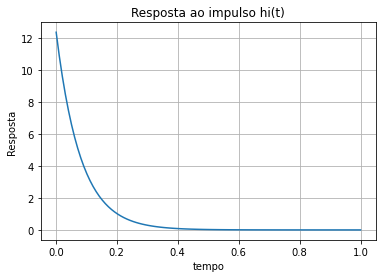

In [58]:
ts = np.linspace(0.001,1,100)
plt.plot(ts, hvt(ts))
plt.grid()
plt.xlabel('tempo')
plt.ylabel('Resposta')
plt.title('Resposta ao impulso hi(t)')
plt.show()